<a href="https://colab.research.google.com/github/frnkly/jayne-eats/blob/main/ml/notes/model-exploration-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Exploration using TensorFlow



# Data

In [2]:
# Dataset, organized as: [classification, consistency, temperature, [ingredients]].
raw_dataset = [
  # Pizzas
  [False, 'solid', 'warm', ['bell pepper', 'cheese', 'flour', 'garlic', 'oil', 'olive', 'onion', 'salt', 'sugar', 'tomato']], # Olives
  [False, 'solid', 'warm', ['anchovy', 'bell pepper', 'cheese', 'flour', 'garlic', 'mayonnaise', 'oil', 'olive', 'onion', 'salt', 'spinach', 'sugar']], # Anchovies
  [False, 'solid', 'warm', ['apple', 'coriander', 'cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar']], # Apple & goat cheese
  [True, 'solid', 'warm', ['arugula', 'bell pepper', 'cheese', 'coriander', 'flour', 'garlic', 'oil', 'onion', 'salt', 'spinach', 'sugar', 'tomato']], # Arugula
  [True, 'solid', 'warm', ['bell pepper', 'cheese', 'flour', 'garlic', 'mushroom', 'oil', 'onion', 'salt', 'sugar']], # Mushroom
  [True, 'solid', 'warm', ['cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar', 'tomato']], # Cheese

  # Products
  # [True, 'crunchy', 'normal', ['anise', 'baking powder', 'egg', 'flour', 'oil', 'sugar']], # Biscotti
  # [True, 'crunchy', 'cool', ['almond', 'barley malt', 'milk', 'rice', 'salt', 'sugar', 'wheat bran', 'whole grain wheat']], # Vanilla almond Special K

  # Smoothies & milkshakes
  [True, 'chewy', 'cool', ['cookies', 'milk', 'skim milk', 'sugar', 'vanilla']], # Oreo ice cream
  [False, 'thick', 'cool', ['blueberry', 'pineapple', 'strawberry']],
  [False, 'thick', 'cool', ['blueberry', 'kiwi', 'strawberry']],
  [False, 'thick', 'cool', ['chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['banana', 'chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['blueberry', 'kiwi', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['banana', 'milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'milk', 'kiwi', 'vanilla']],

  # Soups & chilis
  [False, 'mashed', 'warm', ['bay leaf', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'salt', 'tomato', 'tumeric']], # Chole chickpea curry
  [False, 'mashed', 'warm', ['black pepper', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'potato', 'salt', 'spinach', 'tomato', 'tumeric']], # Sweet potato curry
  [True, 'mashed', 'warm', ['black pepper', 'butter', 'cheese', 'coriander', 'garlic', 'potato', 'salt']], # Mash potatoes
  [True, 'mashed', 'warm', ['bean', 'black pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'tomato', 'tumeric']], # Chili
  [False, 'liquid', 'warm', ['black pepper', 'butter', 'flour', 'garlic', 'onion', 'peanut', 'salt']], # Peanut soup
  [True, 'thick', 'warm', ['black pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'squash']], # Butternut squash soup

  # Miscellaneous (stuff made out of ingredients from above)
  [True, 'crunchy', 'normal', ['almond', 'apple', 'arugula', 'cranberry', 'oil', 'salt']], # Arugula salad
  [True, 'solid', 'warm', ['black pepper', 'cheese', 'egg', 'garlic', 'mushroom', 'oil', 'onion', 'red pepper', 'salt', 'spinach']], # Mushroom spinach omelet
  [True, 'solid', 'warm', ['bean', 'black pepper', 'oil', 'onion', 'rice', 'salt', 'tumeric']], # Rice and beans
  [True, 'solid', 'warm', ['black pepper', 'mushroom', 'oil', 'onion', 'pea', 'rice', 'salt']], # Riz djondjon
  [True, 'solid', 'cool', ['banana', 'butter', 'egg', 'flour', 'milk', 'salt', 'strawberry']], # Crepes
  [False, 'solid', 'warm', ['black pepper', 'oil', 'okra', 'onion', 'rice', 'salt', 'spinach']], # Kalalou
]

RAW_LABEL_COL = 0
RAW_CONSISTENCY_COL = 1
RAW_TEMPERATURE_COL = 2
RAW_INGREDIENTS_COL = 3

print('Size of data set:', len(raw_dataset))

Size of data set: 28


In [5]:
# Ingredients list.
ingredients_set = set()

for data in raw_dataset:
  ingredients_set |= set(data[RAW_INGREDIENTS_COL])

ingredients = sorted(list(ingredients_set))
print(f'Ingredients ({len(ingredients)}):', ingredients)

Ingredients (48): ['almond', 'anchovy', 'apple', 'arugula', 'banana', 'bay leaf', 'bean', 'bell pepper', 'black pepper', 'blueberry', 'butter', 'carrot', 'cheese', 'chickpea', 'chili', 'chocolate', 'cookies', 'coriander', 'cranberry', 'cumin', 'egg', 'flour', 'garlic', 'ginger', 'kiwi', 'mango', 'mayonnaise', 'milk', 'mushroom', 'oil', 'okra', 'olive', 'onion', 'pea', 'peanut', 'pineapple', 'potato', 'red pepper', 'rice', 'salt', 'skim milk', 'spinach', 'squash', 'strawberry', 'sugar', 'tomato', 'tumeric', 'vanilla']


In [10]:
# Processed dataset.
import pandas as pd

processed_dataset = []
feature_names = ['consistency', 'temperature'] + ingredients + ['label']

for data in raw_dataset:
  data_ingredients_set = set(data[RAW_INGREDIENTS_COL])
  processed_data = [data[RAW_CONSISTENCY_COL], data[RAW_TEMPERATURE_COL]]

  for ingredient in ingredients:
    processed_data.append('yes' if ingredient in data_ingredients_set else 'no')
  
  processed_data.append('yes' if data[RAW_LABEL_COL] else 'no')
  
  processed_dataset.append(processed_data)

dataset = pd.DataFrame(processed_dataset, columns=feature_names)
dataset_labels = dataset.pop('label')

dataset.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay leaf,bean,bell pepper,black pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red pepper,rice,salt,skim milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
0,solid,warm,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,yes,no,no
1,solid,warm,no,yes,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,yes,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,no,no,no
2,solid,warm,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no
3,solid,warm,no,no,no,yes,no,no,no,yes,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,yes,no,no
4,solid,warm,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,yes,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no


In [12]:
# Split dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_labels)

print('Training set size:', y_train.size)
print('Testing set size:', y_test.size)

Training set size: 21
Testing set size: 7


# [Linear Classifier](https://www.tensorflow.org/tutorials/estimator/linear)


In [ ]:
# Linear classifier using TensorFlow
import pandas as pd
import tensorflow as tf

X_train.head()

,chewy,crunchy,liquid,mashed,solid,thick,cool,normal,warm,almond,anchovy,apple,arugula,banana,bay leaf,bean,bell pepper,black pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red pepper,rice,salt,skim milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
X_train.describe()

,chewy,crunchy,liquid,mashed,solid,thick,cool,normal,warm,almond,anchovy,apple,arugula,banana,bay leaf,bean,bell pepper,black pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red pepper,rice,salt,skim milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.047619,0.047619,0.047619,0.142857,0.428571,0.285714,0.380952,0.047619,0.571429,0.047619,0.047619,0.095238,0.047619,0.190476,0.047619,0.095238,0.142857,0.285714,0.095238,0.095238,0.047619,0.285714,0.095238,0.142857,0.095238,0.047619,0.142857,0.047619,0.095238,0.095238,0.333333,0.476190,0.095238,0.095238,0.095238,0.047619,0.238095,0.095238,0.523810,0.047619,0.095238,0.571429,0.0,0.047619,0.142857,0.095238,0.047619,0.095238,0.666667,0.047619,0.190476,0.0,0.095238,0.285714,0.238095,0.190476,0.190476
std,0.218218,0.218218,0.218218,0.358569,0.507093,0.462910,0.497613,0.218218,0.507093,0.218218,0.218218,0.300793,0.218218,0.402374,0.218218,0.300793,0.358569,0.462910,0.300793,0.300793,0.218218,0.462910,0.300793,0.358569,0.300793,0.218218,0.358569,0.218218,0.300793,0.300793,0.483046,0.511766,0.300793,0.300793,0.300793,0.218218,0.436436,0.300793,0.511766,0.218218,0.300793,0.507093,0.0,0.218218,0.358569,0.300793,0.218218,0.300793,0.483046,0.218218,0.402374,0.0,0.300793,0.462910,0.436436,0.402374,0.402374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,

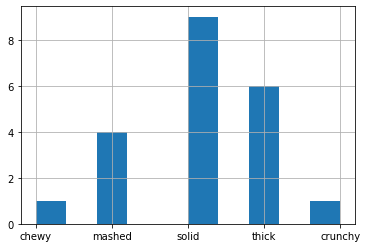

In [14]:
X_train.consistency.hist()

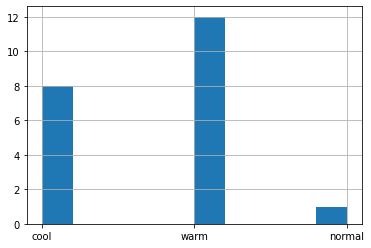

In [15]:
X_train.temperature.hist()

In [ ]:
# Feature columns
tf_columns = []

for name in feature_names:
  tf_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(name, [0, 1]))

In [ ]:
# Input functions

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    return ds
  
  return input_function

train_input_fn = make_input_fn(X_train_df, y_train_df)
eval_input_fn = make_input_fn(X_eval_df, y_eval_df, num_epochs=1, shuffle=False)


In [ ]:
# Linear estimator
linear_est = tf.estimator.LinearClassifier(feature_columns=tf_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpuyl0t3h9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initiali

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


ValueError: ignored